In [9]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy

from dca.cov_util import calc_cross_cov_mats_from_data, calc_pi_from_cross_cov_mats
from dca import DynamicalComponentsAnalysis
from dca.synth_data import embedded_lorenz_cross_cov_mats, random_basis

In [18]:
def pi_vs_dim(cross_cov_mats, max_dim=None, n_init=1):
    opt = ComplexityComponentsAnalysis()
    opt.cross_covs = cross_cov_mats
    if max_dim is None:
        max_dim = cross_cov_mats[0].shape[0]
    dim_vals = np.arange(1, max_dim + 1)
    pi_vals = np.zeros(len(dim_vals))
    for dim_idx in range(len(dim_vals)):
        dim = dim_vals[dim_idx]
        if dim_idx % 5 == 0:
            print("dim =", dim)
        opt.fit_projection(d=dim, n_init=n_init)
        V = opt.coef_
        pi_vals[dim_idx] = calc_pi_from_cross_cov_mats(cross_cov_mats, proj=V)
    return dim_vals, pi_vals

def pi_random_projections(cross_cov_mats, num_samples=500):
    N = cross_cov_mats[0].shape[0]
    pi_vals = np.zeros(num_samples)
    for i in range(num_samples):
        V = random_basis(N, 1)
        pi_vals[i] = calc_pi_from_cross_cov_mats(cross_cov_mats, proj=V)
    return pi_vals

def pi_single_units(cross_cov_mats):
    N = cross_cov_mats[0].shape[0]
    pi_vals = np.zeros(N)
    for i in range(N):
        V = np.zeros((N, 1))
        V[i] = 1.
        pi_vals[i] = calc_pi_from_cross_cov_mats(cross_cov_mats, proj=V)
    return pi_vals

In [4]:
#Get cross cov mats for Lorenz attractor
#TODO: substitute real data, e.g. M1

N = 30
T_pi = 2
T = 2 * T_pi
cross_cov_mats = embedded_lorenz_cross_cov_mats(N, T, return_samples=False, 
                                                num_lorenz_samples=10000,
                                                num_subspace_samples=5000)

In [57]:
#Get PI vs. dim values

dim_vals, pi_vals = pi_vs_dim(cross_cov_mats, n_init=2) #TODO: increase n_init

dim = 1
dim = 6
dim = 11
dim = 16
dim = 21
dim = 26


In [58]:
#Get PI distribution for random projections and single units

rp_pi_vals = pi_random_projections(cross_cov_mats, num_samples=500)
su_pi_vals = pi_single_units(cross_cov_mats)

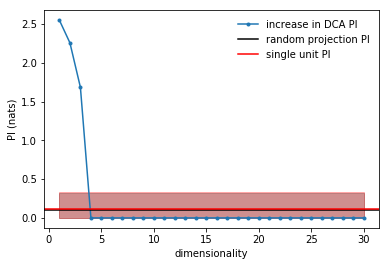

In [59]:
#Plot results
#NOTE: because the embedded Lorenz attractor and noise are both randomly oriented,
#random projections and single-units have the same PI distribution.
#This will probably be close-to-but-not-quite true in actual M1 data.

#TODO: make plot pretty

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
rp_color = "black"
su_color = "red"

pi_vals_diff = np.diff(np.concatenate(([0], pi_vals)))
ax.plot(dim_vals, pi_vals_diff, marker=".", label="increase in DCA PI")

ax.axhline(rp_pi_vals.mean(), c=rp_color, label="random projection PI")
ax.fill_between(x=dim_vals, y1=np.percentile(rp_pi_vals, 5), y2=np.percentile(rp_pi_vals, 95), color=rp_color, alpha=0.25)

ax.axhline(su_pi_vals.mean(), c=su_color, label="single unit PI")
ax.fill_between(x=dim_vals, y1=np.percentile(su_pi_vals, 5), y2=np.percentile(su_pi_vals, 95), color=su_color, alpha=0.25)

ax.set_xlabel("dimensionality")
ax.set_ylabel("PI (nats)")
ax.legend(frameon=False)